# 리스트 조건제시법(List Comprehension)

#### 수정 사항

* 좀 더 복잡한 함수 그래프 작성 활용

## 주요 내용

주어진 리스트를 이용하여 특정 성질을 만족하는 새로운 리스트를 생성하고자 할 때 
**리스트 조건제시법**을 활용하면 매우 효율적인 코딩을 할 수 있다.

리스트 조건제시법은 집합을 정의할 때 사용하는 조건제시법과 매우 유사하다. 
예를 들어,0부터 1억 사이에 있는 홀수들을 원소로 갖는 집합을 정의하려면 
두 가지 방법을 활용할 수 있다. 

* 원소나열법
```
{1, 3, 5, 7, 9, 11, ..., 99999999}
```    
    중간에 사용한 점점점(`...`) 중략기호는 0부터 1억 사이의 총 5천만개의 홀수를 
    나열하는 것은 불가능하기에 사용한 기호이다.
    실제로 1초에 하나씩 숫자를 적는다 해도 5천만 초, 약 1년 8개월이 걸린다.


* 조건제시법
```
{ x | 0 <= x <= 1억, 단 x는 홀수}
```

여기서는 조건제시법을 활용하여 새로운 리스트를 생성하는 방법을 알아본다. 

## 오늘의 주요 예제

$y = x^2$ 함수의 그래프를 아래와 같이 그려보자. 
단, $x$는 -10에서 10사이의 값을 가진다.

<p>
<table cellspacing="20">

<tr>
<td>
<img src="images/pyplot_exp.png" style="width:350">
</td>
</tr>

</table>
</p>

## 특정 성질을 만족하는 리스트 생성하기

### 예제

0부터 20 사이의 모든 홀수를 순서대로 담고 있는 리스트를 어떻게 구현할까?
집합의 경우에서처럼 원소나열법 또는 조건제시법을 활용할 수 있다.

In [1]:
odd_20 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

아니면, 반복문을 활용할 수 있다.

* `while` 반복문: 리스트의 `append()` 메소드를 활용한다.

In [2]:
i = 0
odd_20 = []

while i <= 20:
    if i % 2 == 1:
        odd_20.append(i)
    i += 1
        
print(odd_20)        

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


* `for` 반복문: `range()` 함수를 활용한다.

In [3]:
odd_20 = []

for i in range(21):
    if i % 2 == 1:
        odd_20.append(i)
        
print(odd_20)        

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


### 예제

이제 0부터 1억 사이의 모든 홀수를 순서대로 담고 있는 리스트를 원소나열법으로 구현할 수 있을까?
답은 '아니다'이다. 집합을 정의할 때처럼 생략기호를 사용할 수는 있지만, 제대로 작동하지 않는다. 

예를 들어, 0부터 1억 사이의 모든 홀수들의 리스트를 아래와 같이 선언해 보자.

In [4]:
odd_nums = [1, 3, 5, 7, 9, 11, ..., 99999999]

확인하면 학교에서 배운 것과 비슷하게 작동하는 것처럼 보인다.

In [5]:
print(odd_nums)

[1, 3, 5, 7, 9, 11, Ellipsis, 99999999]


**주의:** `Ellipsis`는 `생략`을 나타낸다.

하지만 처음 10개의 홀수를 얻기 위해 슬라이싱을 사용하면 다음과 같이 엉뚱하게 나온다.

In [6]:
odd_nums[:10]

[1, 3, 5, 7, 9, 11, Ellipsis, 99999999]

위와 같이 작동하는 이유는 생략된 부분이 어떤 규칙으로 나열되는지 파이썬 해석기가 알지 못하기 때문이다.

반면에 반복문을 활용하는 것은 언제든지 가능하다. 
예를 들어, 아래 함수는 0부터 정해진 숫자 사이의 모든 홀수를 순서대로 담은 리스트를 생성하려 리턴한다.

In [7]:
def odd_number(num):
    L=[]
    for i in range(num):
        if i%2 == 1:
            L.append(i)
    return L        

0과 20 사이의 홀수들의 리스트는 다음과 같다.

In [8]:
odd_number(20)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

이제 0과 1억 사이의 홀수들의 리스트를 생성해보자.

**주의:** 아래와 같은 명령어는 실행하지 말자. 5천만개의 숫자를 출력하는 바보같은 일은 하지 말아야 한다.
```
print(odd_number(100000000))
```

In [9]:
odd_100M = odd_number(100000000)

좀 오래 걸린다. 
사용하는 컴퓨터 사양에 따라 시간차이가 발생하지만 1억보다 작은 5천만 개의 홀수를 생성하는 
데에 최신 노트북인 경우 10여초 걸린다.

홀수들의 리스트가 제대로 생성되었는지를 확인하기 위해 처음 20개의 홀수를 확인해보자.

In [10]:
print(odd_100M[:20])

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


### 부록: 프로그램 실행시간 측정하기

프로그램의 실행시간을 확인하려면 `time` 모듈의 `clock()` 함수를 활용하면 된다.
`clock()` 함수의 리턴값은 이 함수를 호출할 때까지 걸린 프로세스 시간을 나타낸다. 

프로세스 시간의 의미를 이해하지 못해도 상관 없다. 
대신에 `time` 모듈의 `clock()` 함수의 활용법을 한 번쯤 본 것으로 만족한다.

In [11]:
import time

start_time = time.clock()
odd_100M = odd_number(100000000)
end_time = time.clock()

print(end_time - start_time, "초")

8.329422000000001 초


#### 이제 질문을 좀 다르게 하자. 
`odd_number` 함수를 좀 더 간결하게 정의할 수 없을까? 

이에 대해 파이썬에서는 리스트 조건제시법이라는 기술을 제공한다. 
이 기술을 모든 언어가 지원하지는 않는다. 
예를 들어, C# 언어는 `from ... where ... select ...` 가 비슷한 역할을 지원하지만 좀 다르고, 
Java 언어에서는 함수 인터페이스를 이용하여 비슷한 기능을 구현할 수 있다.

## 리스트 조건제시법 이해

리스트 조건제시법은 집합 정의에 사용되는 조건제시법과 매우 비슷하게 작동한다.
예를 들어, 0부터 1억 사이의 홀수들을 순서대로 항목으로 갖는 리스트를 생성하는 과정을 
설명하면서 조건제시법의 이해를 돕고자 한다. 

* 먼저, 앞서 개요에서 설명한 대로 0부터 1억 사이의 홀수들의 집합을 
    조건제시법으로로 표현한다. 
```
{x | 0 <= x <= 100000000, 단 x는 홀수}
```    

* 이제 집합기호를 리스트 기호로 대체한다.
```
[x | 0 <= x <= 100000000, 단 x는 홀수]
```    

* 집합의 짝대기(`|`) 기호는 `for`로 대체한다.
```
[x for 0 <= x <= 100000000, 단 x는 홀수]
```    

* 짝대기 기호 오른편에 위치하고, 변수 `x`가 어느 범위에서 움직이는지를 설명하는 
    부등식인 `0 <= x <= 100000000` 부분을 파이썬 수식으로 변경한다.
    주로, 기존에 정의된 리스트를 사용하거나 `range()` 함수를 활용하여
    범위를 `x in ...` 형식으로 지정한다. 
```
[x for x in range(100000000+1), 단 x는 홀수]
```    

* 마지막으로 변수 `x`에 대한 제한조건인 `단 x는 홀수` 부분을 
    파이썬의 `if` 문장으로 변경한다. 
    예를 들어, `x는 홀수`는 파이썬의 `x % 2 == 1`로 나타낼 수 있다.
```
[x for x in range(100000001) if x % 2 == 1]
```    

In [12]:
odd_100M = [x for x in range(100000001) if x % 2 == 1]

In [13]:
odd_100M[:10]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

### 예제

0부터 1억 사이의 홀수들의 제곱을 항목으로 갖는 리스트를 조건제시법으로 생성할 수 있다.

In [14]:
odd_100M_square = [x**2 for x in range(100000000) if x % 2== 1]

In [15]:
odd_100M_square[:10]

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]

물론 앞서 만든 `odd_100M`을 재활용할 수 있다.

In [16]:
odd_100M_square = [x**2 for x in odd_100M]

In [17]:
odd_100M_square[:10]

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]

### 예제

0부터 1억 사이의 홀수들을 항목으로 갖는 리스트를 다른 조건제시법으로 생성해보자.

먼저, 모든 홀수는 `2*x + 1`의 모양을 갖는다는 점에 주의한다.
따라서 1억보다 작은 홀수는 아래와 같이 생성할 수 있다. 

In [18]:
odd_100M2 = [2 * x + 1 for x in range(50000000)]

In [19]:
odd_100M2[:10]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

이 방식은 좀 더 쉬워 보인다. `if` 문이 없기 때문이다. 
위에서 사용한 조건제시법을 `for` 반복문을 이용하여 구현하면 아래처럼 할 수 있다. 

In [20]:
odd_100M2 = []

for x in range(50000000):
    odd_100M2.append(2*x+1)

odd_100M2[:10]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

## 오늘의 주요 예제 해결

$y = x^2$ 함수의 그래프를 그리고자 한다. 

그래프를 그리기 위해 `matplotlib.pyplot` 이란 모듈을 이용한다. 

아래 코드처럼 퍼센트 기호(`%`)로 시작하는 코드는 쥬피터 노트북에만 사용하는 코드이며,
아래 코드는 쥬피터 노트북에 그래프를 직접 나타내기 위해 사용한다.
spyder 등 파이썬 에디터를 사용하는 경우 필요하지 않는 코드이다.

In [21]:
%matplotlib inline

`matplotlib.pyplot` 모듈 이름이 길어서 보통은 `plt` 라고 줄여서 부른다.

In [22]:
import matplotlib.pyplot as plt

그래프를 그리기 위해서는 먼저 필요한 만큼의 점을 찍어야 한다.
2차원 그래프의 점은 x좌표와 y좌표의 쌍으로 이루어져 있음을 기억한다.
그리고 파이썬의 경우 점들의 그래프를 그리기 위해서는 점들의 x좌표 값들의 리스트와 
y좌표 값들의 리스트를 제공해야 한다.

기본적으로 점을 많이 찍을 수록 보다 정확한 그래프를 그릴 수 있지만 몇 개의 점으로도 
그럴싸한 그래프를 그릴 수 있다.
예를 들어, (-10, 100), (-5, 25), (0, 0), (5, 25), (10, 100) 
다섯 개의 점을 잇는 그래프를 그리기 위해
```
xs = [-10, -5, 0, 5, 10]
```
와 
```
ys = [100, 25, 0, 25, 100]
```
의 각각의 점들의 x좌표 값들의 리스트와 y좌표 값들의 리스트를 활용한다.

`ys` 리스트의 각각의 항목은 `xs` 리스트의 동일한 위치에 해당하는 항목의 제곱임에 주의하라.

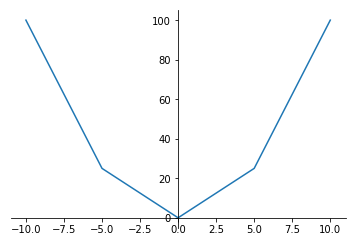

In [23]:
### 그래프 준비 시작 ###
# 여기부터 아래 세 개의 우물정 표시 부분까지는 그래프를 그리기 위해 준비하는 부분이다.
# 이해하려 하지 말고 그냥 기억만 해두면 된다.

# 그림을 그리기 위한 도화지를 준비하는 용도이다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축은 아래에, y축은 그림의 중심에 위치하도록 한다.
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# 그래프를 둘러싸는 상자를 없앤다.
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
### 그래프 그리기 준비 끝 ###

# x좌표와 y좌표 값들의 리스트를 제공한다.
# 여기서는 조건제시법을 활용한다.
xs = [x for x in range(-10, 11, 5)]
ys = [x**2 for x in xs]

# 이제 plot() 함수를 호출하여 그래프를 그린다.
plt.plot(xs, ys)
plt.show()

보다 많은 점을 찍으면 보다 부드러운 그래프를 얻을 수 있다.

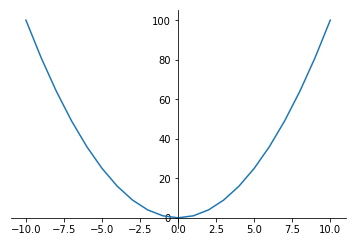

In [24]:
### 그래프 준비 시작 ###
# 여기부터 아래 세 개의 우물정 표시 부분까지는 그래프를 그리기 위해 준비하는 부분이다.
# 이해하려 하지 말고 그냥 기억만 해두면 된다.

# 그림을 그리기 위한 도화지를 준비하는 용도이다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축은 아래에, y축은 그림의 중심에 위치하도록 한다.
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# 그래프를 둘러싸는 상자를 없앤다.
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
### 그래프 그리기 준비 끝 ###

# x좌표와 y좌표 값들의 리스트를 제공한다.
# 여기서는 조건제시법을 활용한다.
xs = [x for x in range(-10, 11)]
ys = [x**2 for x in xs]

# 이제 plot() 함수를 호출하여 그래프를 그린다.
plt.plot(xs, ys)
plt.show()

## 연습문제

### 연습

수학에서 사용되는 대표적인 지수함수인 $f(x) = e^x$는 `math` 모듈의 `exp()`로 정의되어 있다. 
아래 리스트를 조건제시법으로 구현하라. 

$$[e^1, e^3, e^5, e^7, e^9]$$

**주의:** $e$의 값은 대략 2.718 정도이다.

견본답안:

In [25]:
from math import exp

In [26]:
[exp(n) for n in range(10) if n % 2 == 1]

[2.718281828459045,
 20.085536923187668,
 148.4131591025766,
 1096.6331584284585,
 8103.083927575384]

### 연습

아래 리스트를 조건제시법으로 구현하라.

$$[e^3, e^6, e^9, e^{12}, e^{15}]$$

**힌트:** `range(1, 6)`을 활용할 수 있다.

견본답안:

In [27]:
[exp(3*n) for n in range(1,6)]

[20.085536923187668,
 403.4287934927351,
 8103.083927575384,
 162754.79141900392,
 3269017.3724721107]

### 연습

조건제시법은 데이터를 처리하는 데에 매우 효과적이다. 
예를 들어, 어떤 영어 문장에 사용된 단어들의 길이를 분석할 수 있다. 

아래와 같이 파이썬을 소개하는 문장이 있다.

In [28]:
about_python = 'Python is a general-purpose programming language. \
                It is becoming more and more popular \
                for doing data science.'

위 문장에 사용된 단어들의 길이를 분석하기 위해 먼저 위 문장을 단어로 쪼갠다. 
이를 위해, 문자열에 사용하는 `split()` 메소드를 사용한다.

In [29]:
words = about_python.split()
words

['Python',
 'is',
 'a',
 'general-purpose',
 'programming',
 'language.',
 'It',
 'is',
 'becoming',
 'more',
 'and',
 'more',
 'popular',
 'for',
 'doing',
 'data',
 'science.']

위 `words` 리스트의 각 항목의 문자열들을 모두 대문자로 바꾼 단어와 그리고 해당 항목의 문자열의 길이를 항목으로 갖는 튜플들의 리스트를 작성하고자 한다. 
```
[('PYTHON', 6), ('IS', 2), ....]
```    
    
반복문을 이용하여 아래와 같이 작성할 수 있다.

In [30]:
L =[]
for x in words:
    L.append((x.upper(), len(x)))
    
L

[('PYTHON', 6),
 ('IS', 2),
 ('A', 1),
 ('GENERAL-PURPOSE', 15),
 ('PROGRAMMING', 11),
 ('LANGUAGE.', 9),
 ('IT', 2),
 ('IS', 2),
 ('BECOMING', 8),
 ('MORE', 4),
 ('AND', 3),
 ('MORE', 4),
 ('POPULAR', 7),
 ('FOR', 3),
 ('DOING', 5),
 ('DATA', 4),
 ('SCIENCE.', 8)]

리스트 조건제시법으로는 아래와 같이 보다 간결하게 구현할 수 있다.

In [31]:
[(x.upper(), len(x)) for x in words]

[('PYTHON', 6),
 ('IS', 2),
 ('A', 1),
 ('GENERAL-PURPOSE', 15),
 ('PROGRAMMING', 11),
 ('LANGUAGE.', 9),
 ('IT', 2),
 ('IS', 2),
 ('BECOMING', 8),
 ('MORE', 4),
 ('AND', 3),
 ('MORE', 4),
 ('POPULAR', 7),
 ('FOR', 3),
 ('DOING', 5),
 ('DATA', 4),
 ('SCIENCE.', 8)]

처음 다섯 개의 단어만 다루고자 할 경우에는 아래처럼 하면 된다.

In [32]:
[(x.upper(), len(x)) for x in words[:5]]

[('PYTHON', 6),
 ('IS', 2),
 ('A', 1),
 ('GENERAL-PURPOSE', 15),
 ('PROGRAMMING', 11)]

아래처럼 인덱스에 제한을 가하는 방식도 가능하다. 즉, `if` 문을 추가로 활용한다.

In [33]:
[(words[n].upper(), len(words[n])) for n in range(len(words)) if n < 5]

[('PYTHON', 6),
 ('IS', 2),
 ('A', 1),
 ('GENERAL-PURPOSE', 15),
 ('PROGRAMMING', 11)]

**질문:**

위 단어들 중에서 `'language.'`와 `'science.'` 두 경우에 마침표가 사용되었다. 
마침표를 제외한 단어의 길이를 표시하도록 위 코드를 수정하라.

힌트: `strip()` 문자열 메소드를 활용한다.

견본답안:

In [34]:
[(x.strip('.').upper(), len(x.strip('.'))) for x in words]

[('PYTHON', 6),
 ('IS', 2),
 ('A', 1),
 ('GENERAL-PURPOSE', 15),
 ('PROGRAMMING', 11),
 ('LANGUAGE', 8),
 ('IT', 2),
 ('IS', 2),
 ('BECOMING', 8),
 ('MORE', 4),
 ('AND', 3),
 ('MORE', 4),
 ('POPULAR', 7),
 ('FOR', 3),
 ('DOING', 5),
 ('DATA', 4),
 ('SCIENCE', 7)]

### 연습

머신러닝의 인공신경만(Artificial Neural Network) 분야에서 활성화 함수(activation function)로 많이 사용되는 ReLU(Rectified Linear Unit) 함수를 그래프로 그려보자. ReLu 함수의 정의는 다음과 같다.

$$
f(x) = \begin{cases} 0 & x <0 \text{ 인 경우,} \\ 1 & x \ge 0 \text{ 인 경우.}\end{cases}
$$

참조: ReLU 함수에 대한 간단한 설명은 [여기](http://mongxmongx2.tistory.com/25)에서 확인할 수 있다.

견본답안:

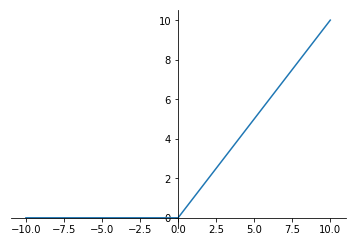

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

xs = [x for x in range(-10, 11)]
ys = [max(0, x) for x in xs]

plt.plot(xs, ys)
plt.show()